In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = pd.read_csv('prediction_1.csv')
data.head()

,video_ID,ankle_knee_hip_leftangle_mean,ankle_knee_hip_rightangle_mean,toe_ankle_knee_leftangle_mean,toe_ankle_knee_rightangle_mean,toe_ankle_dist_left_mean,toe_ankle_dist_right_mean,lank_rank_xdist_mean,rank_lank_xdist_mean,pred
0,5965701,2.998101,2.958826,2.700650,2.597290,0.255852,0.260874,-0.221719,0.221719,1
1,6556301,2.566151,2.677394,1.798047,2.204845,0.353623,0.311750,-0.085102,0.085102,1
2,7337701,3.007963,3.043333,2.114597,2.160598,0.263494,0.297471,0.005728,-0.005728,1
3,7728303,2.831840,2.870536,2.358614,2.351945,0.342968,0.348770,0.058776,-0.058776,1
4,8026901,2.905669,2.975658,1.955359,2.005561,0.312410,0.227370,0.084806,-0.084806,1


In [3]:
feature_cols = ['ankle_knee_hip_leftangle_mean','ankle_knee_hip_rightangle_mean','toe_ankle_knee_leftangle_mean','toe_ankle_knee_rightangle_mean','toe_ankle_dist_left_mean','toe_ankle_dist_right_mean','lank_rank_xdist_mean','rank_lank_xdist_mean' ]
X = data.iloc[:,[1,2,3,4,5,6,7,8]].values
y = data.iloc[:,9].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.75, random_state= 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)


In [31]:
#prediction
y_pred = model.predict(X_test)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.8403508771929824


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 21, 111],
       [ 71, 937]], dtype=int64)

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No Risk','Risk'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [34]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=5)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.875438596491228


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.02      0.03       132
           1       0.88      0.99      0.93      1008

    accuracy                           0.88      1140
   macro avg       0.51      0.50      0.48      1140
weighted avg       0.80      0.88      0.83      1140



In [11]:
model.predict([[2.8847466906306938,2.9376638011776786,2.561574636308094,2.5676729208515265,0.38224499328243783,0.36999847804478586,0.10507483363378983,-0.10507483363378983]])

array([1], dtype=int64)

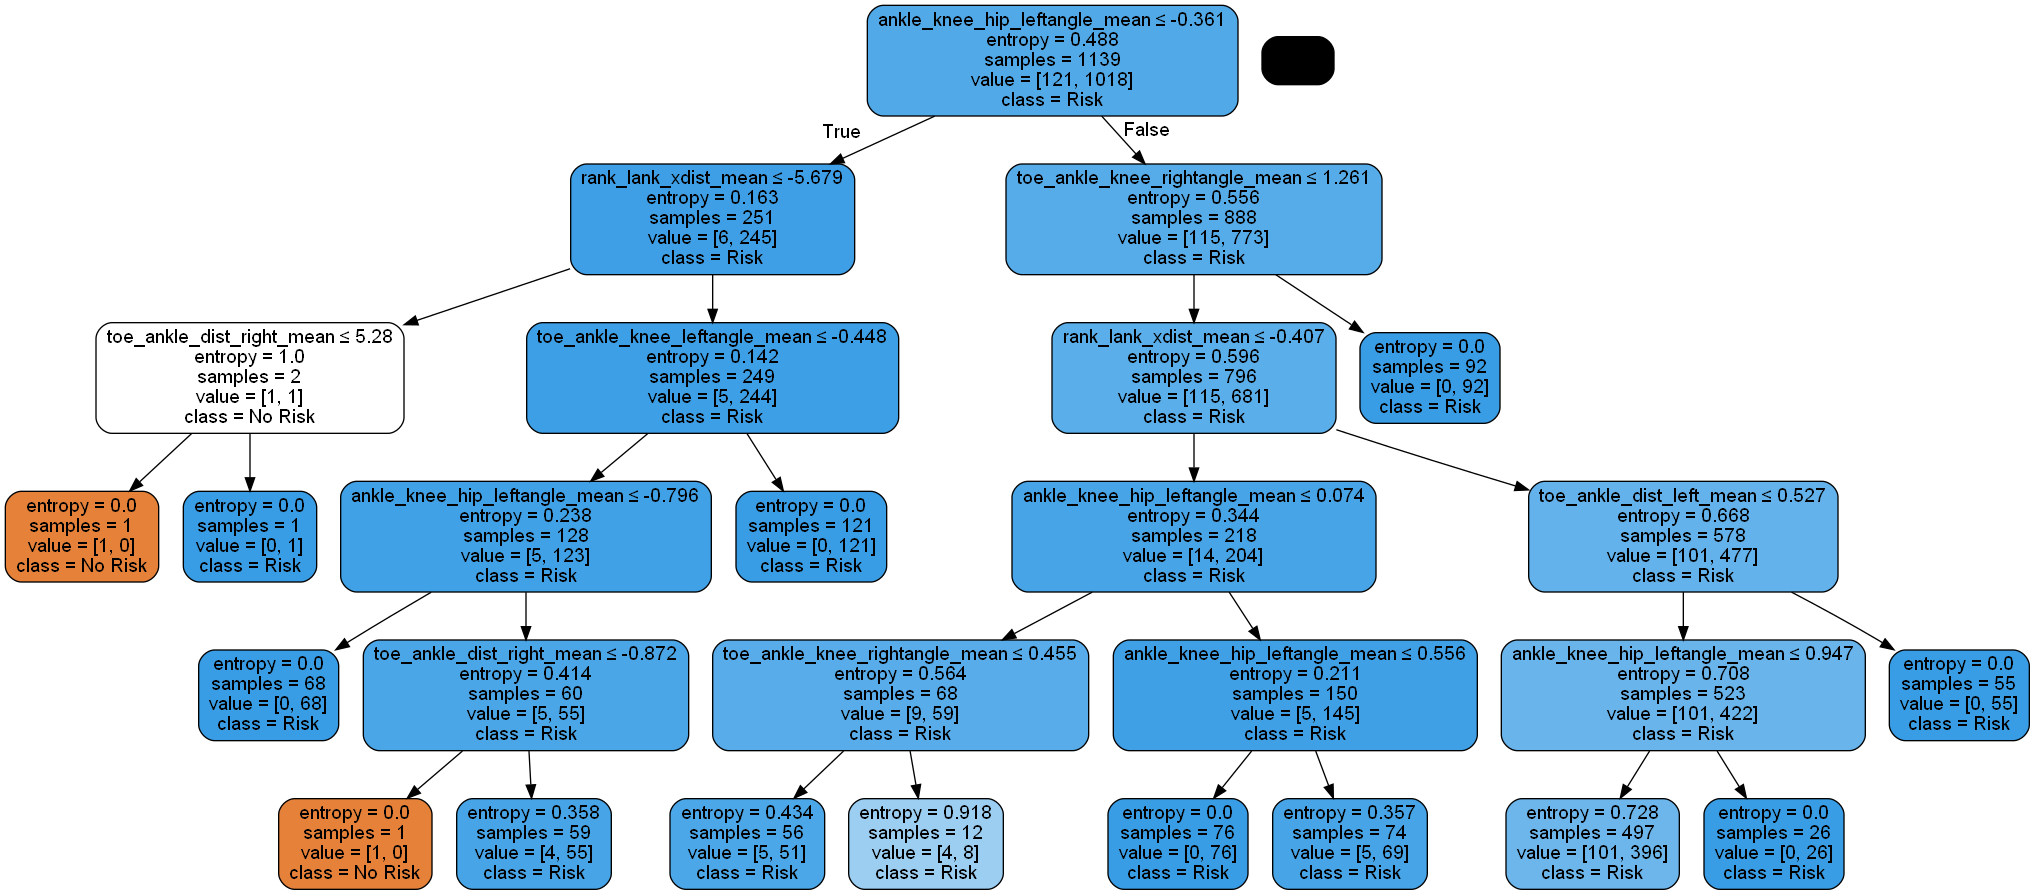

In [12]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['No Risk','Risk'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())